In [2]:
import pandas as pd
import numpy as np
from feature_engineering import *
from Models import *
import os

# Understanding the dataset

### Load the dataset

In [3]:
# Define path to your local data folder
DATA_PATH = os.path.join('Data')  # Assuming 'data' is in the same directory as your script

# Construct full paths to train and test files
train_file_path = os.path.join(DATA_PATH, 'train.jsonl')
test_file_path = os.path.join(DATA_PATH, 'test.jsonl')

train_data = get_dict_from_json(train_file_path)
test_data = get_dict_from_json(test_file_path)

## How many different pokemons ?

### Train_data 

all the observed different pokemons in the p1 team and p2_lead

In [4]:
pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)

,name,level,type1,type2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,alakazam,100,notype,psychic,55,50,45,135,135,120
1,articuno,100,flying,ice,90,85,100,125,125,85
2,chansey,100,normal,notype,250,5,5,105,105,50
3,charizard,100,fire,flying,78,84,78,85,85,100
4,cloyster,100,ice,water,50,95,180,85,85,70
5,dragonite,100,dragon,flying,91,134,95,100,100,80
6,exeggutor,100,grass,psychic,95,95,85,125,125,55
7,gengar,55,ghost,poison,60,65,60,130,130,110
8,gengar,100,ghost,poison,60,65,60,130,130,110
9,golem,100,ground,rock,80,110,130,55,55,45


Let's see if the opponents use the same pokemons

In [5]:
A=pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)
A=set(A['name'])

B= opponents_pokemon(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)
B=set(B['name'])

# lets see if B is subset of A
B.issubset(A)  # it is


True

we can obtain the stats of the opponent pokemon given only his name

### Test_data

Lets check the if also the test set has this property

In [6]:
pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True) 

,name,level,type1,type2,base_hp,base_atk,base_def,base_spa,base_spd,base_spe
0,alakazam,100,notype,psychic,55,50,45,135,135,120
1,alakazam,55,notype,psychic,55,50,45,135,135,120
2,articuno,100,flying,ice,90,85,100,125,125,85
3,chansey,100,normal,notype,250,5,5,105,105,50
4,charizard,100,fire,flying,78,84,78,85,85,100
5,cloyster,100,ice,water,50,95,180,85,85,70
6,dragonite,100,dragon,flying,91,134,95,100,100,80
7,exeggutor,100,grass,psychic,95,95,85,125,125,55
8,gengar,100,ghost,poison,60,65,60,130,130,110
9,golem,100,ground,rock,80,110,130,55,55,45


In [7]:
A=pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)
A=set(A['name'])

B= opponents_pokemon(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)
B=set(B['name'])

# lets see if B is subset of A
B.issubset(A)  # it is

True

We can definitevly obtain the base stats and defense type of the opponent pokemon given only his name: its a deterministic map. \
Moreover the opponents use always pokemons that appear in the p2_lead or in the p1_team.

In [8]:
# all the observed different pokemons in the p1 team and p2_lead in train and test datasets, we can do the union of the datafraemes

Tr=pokedex(train_data).drop_duplicates().sort_values('name').reset_index(drop=True)

Te=pokedex(test_data).drop_duplicates().sort_values('name').reset_index(drop=True)

All_pokemons=pd.concat([Tr,Te]).drop_duplicates().sort_values('name')['name'].drop_duplicates().reset_index(drop=True)

#compare all_pokemons with Tr['name'].drop_duplicates().reset_index(drop=True)
All_pokemons.equals(Tr['name'].drop_duplicates().reset_index(drop=True))  # it is true the test set pokemons are all in the train set, no problem of unseen pokemons

True

## What about pokemon levels ?

In [9]:
# counting the distribution of levels in the train dataset

pokedex(train_data)['level'].value_counts().sort_index()

level
55        2
100    9998
Name: count, dtype: int64

In [10]:
# counting the distribution of levels in the test dataset

pokedex(test_data)['level'].value_counts().sort_index()

level
55        1
100    4999
Name: count, dtype: int64

we can just drop as a feature the information about levels, theyare basically all 100

# Feature engineering

Lets build up our features

## avg_effectiveness (types)

each pokemon move has a multiplier that depends on 
- type of the move (move_type) from pokemon P1
- types of the opponent pokemon P2 (defense_types) 

so each couple (move_type,def_types) has a multiplier, this feature compute the avg of this multiplier for each player and then takes the difference 

In [13]:
avg_effectiveness_1_1(train_data,difference=True)

,battle_id,avg_effectiveness_diff,player_won
0,0,0.400000,True
1,1,-0.050000,True
2,2,0.366667,True
3,3,-0.116667,True
4,4,-0.133333,True
...,...,...,...
9995,9995,-0.283333,False
9996,9996,0.200000,False
9997,9997,-0.050000,False
9998,9998,0.116667,False


How much is 'linked' this difference to the battle outcome ?

In [14]:
# how many times P1 wins when avg_diff > 0 
# True and false positives 
avg_effectiveness_1_1(train_data,difference=True)[avg_effectiveness_1_1(train_data,difference=True)["avg_diff"]>0.0]["player_won"].value_counts(normalize=True)

KeyError: 'avg_diff'

In [ ]:
# how many times P1 doesnt win when avg_diff < 0
# True and false negatives
avg_effectiveness_1_1(train_data,difference=True)[avg_effectiveness_1_1(train_data,difference=True)["avg_diff"]<0.0]["player_won"].value_counts(normalize=True)

player_won
False    0.695954
True     0.304046
Name: proportion, dtype: float64

we obtain 70% of true predictions only using 1 parameter

### Bonus: last 10 turns matter more ?

we have also implemented an extended version with turn segmentation so that the model could learn wich turns matter more ( start, middle, end )

In [ ]:
avg_effectiveness2(train_data,difference=True,divide_turns=True) 

,battle_id,player_won,avg_diff_first_10,avg_diff_middle_10,avg_diff_last_10
0,0,True,0.40,0.40,0.40
1,1,True,0.05,-0.10,-0.10
2,2,True,0.60,0.20,0.30
3,3,True,-0.30,0.20,-0.25
4,4,True,-0.25,-0.05,-0.10
...,...,...,...,...,...
9995,9995,False,-0.10,-0.70,-0.05
9996,9996,False,0.00,0.05,0.55
9997,9997,False,-1.00,0.25,0.60
9998,9998,False,0.00,0.15,0.20


## Category_Impact_Score

In [15]:
category_impact_score(train_data,difference=True)

,battle_id,cat_impact_diff,player_won
0,0,0.957172,True
1,1,0.054818,True
2,2,0.135543,True
3,3,-6.463175,True
4,4,0.589761,True
...,...,...,...
9995,9995,1.130936,False
9996,9996,-2.527752,False
9997,9997,1.884878,False
9998,9998,-1.468128,False


In [16]:
# how many times P1 wins when cat_impact_diff > 0 
# True and false positives

category_impact_score(train_data,difference=True)[category_impact_score(train_data,difference=True)["cat_impact_diff"]>0]["player_won"].value_counts(normalize=True)


player_won
True     0.575228
False    0.424772
Name: proportion, dtype: float64

alone its not a good predictor because it doesnt take into account the base_power, but its not a problem for our model because we consider the base_power in other features

## avg_stab_multiplier

Same-Type Attack Bonus (STAB) means that if a Pokémon uses an attacking move of the same type as the Pokémon using it, that move gets 1.5× its usual base power. This is a huge bonus, so most Pokémon carry at least one STAB move.

In [ ]:
avg_stab_multiplier(train_data,difference=True)

,battle_id,avg_stab_diff,player_won
0,0,0.466667,True
1,1,0.100000,True
2,2,0.350000,True
3,3,-0.100000,True
4,4,0.016667,True
...,...,...,...
9995,9995,-0.116667,False
9996,9996,-0.050000,False
9997,9997,0.083333,False
9998,9998,-0.116667,False


## avg_final_HP_pct

'''Calculate the average HP percentage of P1 and P2's Pokémon at the end of the 30 turns.'''

In [ ]:
avg_final_HP_pct(train_data)

,battle_id,avg_final_hp_pct_p1,avg_final_hp_pct_p2,player_won
0,0,0.645469,0.441250,True
1,1,0.263333,0.428333,True
2,2,0.696667,0.693333,True
3,3,0.340000,0.476667,True
4,4,0.626667,0.525000,True
...,...,...,...,...
9995,9995,0.433333,0.611667,False
9996,9996,0.275000,0.353333,False
9997,9997,0.596667,0.798333,False
9998,9998,0.500000,0.511667,False


In [ ]:
avg_final_HP_pct(train_data,difference=True)

,battle_id,avg_final_hp_pct_diff,player_won
0,0,0.204219,True
1,1,-0.165000,True
2,2,0.003333,True
3,3,-0.136667,True
4,4,0.101667,True
...,...,...,...
9995,9995,-0.178333,False
9996,9996,-0.078333,False
9997,9997,-0.201667,False
9998,9998,-0.011667,False


In [ ]:
# compare avg_final_HP_pct p1 > avg_final_HP_pct p2 with player_won and value counts

a = avg_final_HP_pct(train_data,difference=True)

a[a["avg_final_hp_pct_diff"]>0]["player_won"].value_counts(normalize=True)



player_won
True     0.909204
False    0.090796
Name: proportion, dtype: float64

## The final dataset

In [11]:
final_table_train=generate_features(train_data, flag_test=False)

final_table_train

,battle_id,avg_effectiveness_diff,cat_impact_diff,avg_stab_diff,avg_final_hp_pct_diff,avg_atk_boost_diff,avg_def_boost_diff,avg_spa_boost_diff,avg_spd_boost_diff,avg_spe_boost_diff,avg_hp_diff_per_turn,avg_atk_diff_per_turn,avg_def_diff_per_turn,avg_spa_diff_per_turn,avg_spd_diff_per_turn,avg_spe_diff_per_turn,avg_accuracy_diff,avg_basepower_diff,player_won
0,0,0.200000,0.957172,0.466667,0.204219,0.0,0.0,0.066667,0.066667,0.000000,14.555064,-17.333333,-9.333333,9.500000,9.500000,2.166667,0.306667,15.166667,True
1,1,-0.050000,0.054818,0.100000,-0.165000,0.0,0.0,0.066667,0.066667,0.000000,-12.351667,0.833333,3.500000,-8.666667,-8.666667,-2.166667,-0.005000,18.533333,True
2,2,-0.150000,0.135543,0.350000,0.003333,0.0,0.0,0.266667,0.266667,0.000000,44.566667,32.333333,16.166667,-16.833333,-16.833333,-56.666667,0.158333,-8.133333,True
3,3,-0.216667,-6.463175,-0.100000,-0.136667,0.0,0.0,0.000000,0.000000,0.000000,51.390000,-54.333333,-40.500000,9.166667,9.166667,-22.166667,-0.051667,-23.000000,True
4,4,0.050000,0.589761,0.016667,0.101667,0.0,0.0,-0.066667,-0.066667,0.000000,9.348333,-14.500000,-20.000000,13.666667,13.666667,4.000000,0.016667,-10.533333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-0.233333,1.130936,-0.116667,-0.178333,0.0,0.0,0.000000,0.000000,0.000000,-1.390000,4.833333,6.333333,-15.166667,-15.166667,-9.500000,-0.116667,-13.666667,False
9996,9996,0.033333,-2.527752,-0.050000,-0.078333,0.0,0.0,0.000000,0.000000,-0.200000,35.901667,-42.000000,-32.833333,4.333333,4.333333,-20.500000,0.051667,-8.166667,False
9997,9997,0.133333,1.884878,0.083333,-0.201667,0.0,0.0,0.000000,0.000000,0.000000,-64.515000,18.833333,26.000000,12.500000,12.500000,25.500000,0.020000,33.666667,False
9998,9998,0.083333,-1.468128,-0.116667,-0.011667,0.0,0.0,-0.100000,-0.100000,-0.733333,46.426667,-9.333333,-22.000000,-26.833333,-26.833333,-41.000000,0.006667,-1.666667,False


In [12]:
# now we do this for test 
final_table_test=generate_features(test_data, flag_test=True)

# Models

In [16]:
Y_train = final_table_train['player_won'].astype(int)

X_train = final_table_train.drop(columns=['player_won', 'battle_id'])

X_test = final_table_test.drop(columns=['battle_id'])


## Logistic Regression

### Correlation and PCA

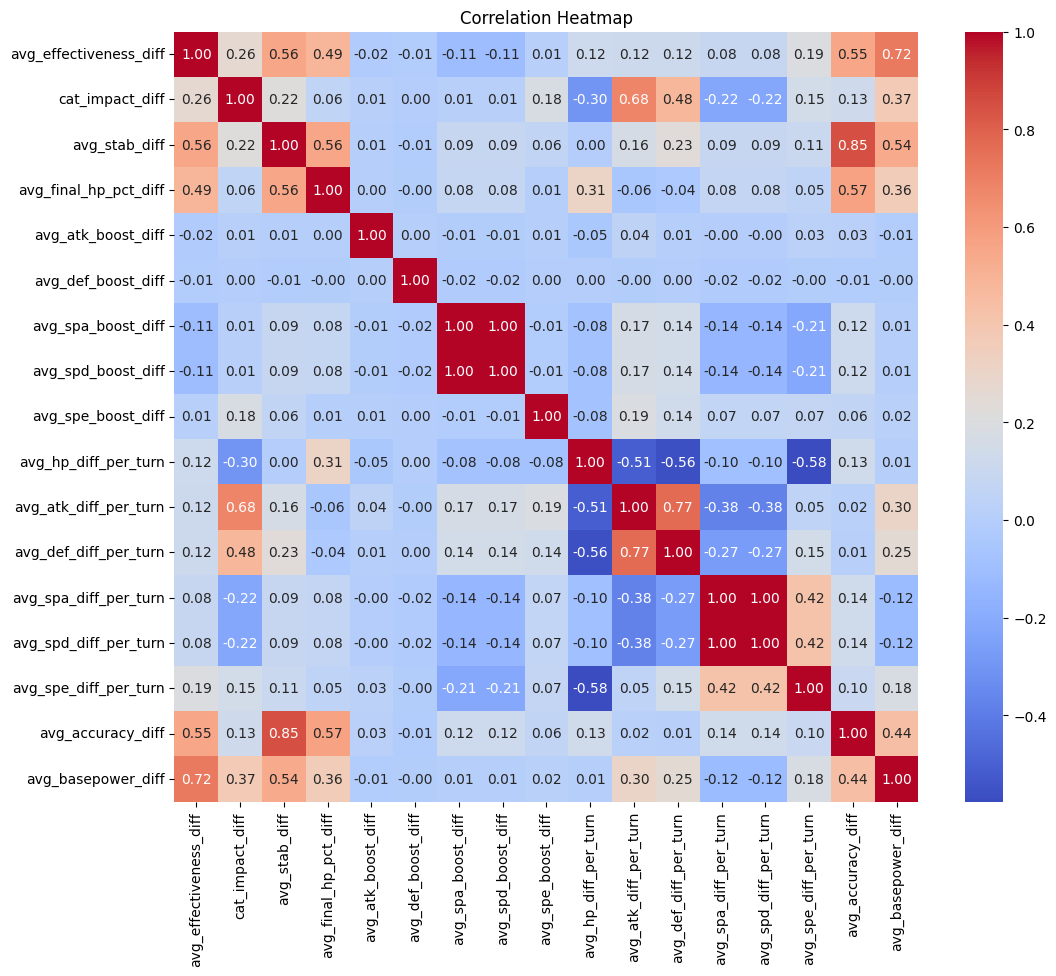

In [15]:
# plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt 
corr = X_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

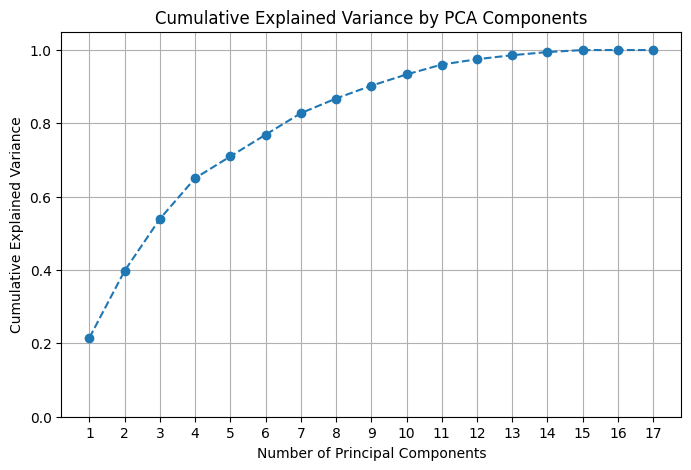

array([0.21562128, 0.39822684, 0.53974371, 0.65064095, 0.70997495,
       0.76920975, 0.82778894, 0.86783736, 0.90277209, 0.93342487,
       0.96044838, 0.97491755, 0.98599348, 0.99451701, 0.99999996,
       1.        , 1.        ])

In [16]:
plot_pca_variance(X_train)

### Tuning hyperparameters with Grid Search

- with NO PCA the L2 regularization with the hyperparameter C manage directly the collinearity and prevents the model from assigning huge importance to any single feature, making it less sensitive to noise in the training data and better at generalizing.

- with PCA we remove collinearity before the fit. Then, L2 Regularization just preventing overfitting on the new, smaller set of n_components uncorrelated features.

In [13]:
pipeline_no_pca = create_model_pipeline(random_state=0)

param_grid_no_pca = {
    'model__C': [0.007, 0.01, 0.1, 1.0, 10.0, 100.0]
}

print("--- Grid Search for Non-PCA Model ---")
best_model_no_pca = perform_grid_search(
    pipeline_no_pca, 
    param_grid_no_pca, 
    X_train, 
    Y_train
)

pipeline_pca = create_model_pipeline_PCA(random_state=0)


param_grid_pca = {
    'pca__n_components': [8, 11, 13, 15, 17],  # Test different numbers of components max=17
    'model__C': [0.007, 0.01, 0.1, 1.0, 10.0]  # Test different C values
}

print("\n--- Grid Search for PCA Model ---")
best_model_pca = perform_grid_search(
    pipeline_pca, 
    param_grid_pca, 
    X_train, 
    Y_train
)

--- Grid Search for Non-PCA Model ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.007}
Best cross-validation accuracy: 0.82460000

--- Grid Search for PCA Model ---
Fitting 5 folds for each of 25 candidates, totalling 125 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.007, 'pca__n_components': 15}
Best cross-validation accuracy: 0.82460000


In [19]:
# try polynomial features with degree 2
pipeline_poly = create_model_pipeline_poly(max_iter=4000, random_state=0)

param_grid_poly = {
    'poly_features__degree': [2],  # Test degree 2 and 3
    'model__C': [0.007, 0.01, 0.1, 1.0, 10.0]  # Test different C values
}       

print("\n--- Grid Search for Polynomial Features Model ---")
best_model_poly = perform_grid_search(
    pipeline_poly, 
    param_grid_poly, 
    X_train, 
    Y_train
)   


--- Grid Search for Polynomial Features Model ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.01, 'poly_features__degree': 2}
Best cross-validation accuracy: 0.82040000


#### only one feature

with only one feature we have a cross-validation accuracy: 0.81250000, with this model the other 16 features raise the score only by 1%: can't figure out how to combine it with the other features effectively.

In [39]:
pipeline_no_pca_one_column = create_model_pipeline(random_state=0)

param_grid_no_pca_one_column = {
    'model__C': [0.0004, 0.001, 0.01, 0.1, 1.0, 10.0]
}   
print("--- Grid Search for Non-PCA Model with One Column ---")
best_model_no_pca_one_column = perform_grid_search(
    pipeline_no_pca_one_column, 
    param_grid_no_pca_one_column, 
    X_train['avg_final_hp_pct_diff'].to_frame(),
    Y_train
)

--- Grid Search for Non-PCA Model with One Column ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Grid Search Complete.
Best parameters found: {'model__C': 0.0004}
Best cross-validation accuracy: 0.81250000


### Train the models with the best hyperparameters

In [19]:
pipeline_pca=create_model_pipeline_PCA(c_value=0.007, n_components=15)

submission_pca = train_and_predict(pipeline_pca, X_train, Y_train, X_test, final_table_test['battle_id'])

submission_pca.to_csv('submission_pca.csv', index=False)

Training the pipeline...
Training complete.
Making predictions...
Predictions complete.


## Random Forest 

## XGBoost